In [1]:
import pandas as pd
import numpy as np
import json
# データ可視化ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import re
from tqdm import tqdm_notebook as tqdm

import lightgbm as lgb
print('lightgbm version:', lgb.__version__)

from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import sklearn
print('sklearn version:', sklearn.__version__)
from sklearn.model_selection import train_test_split

lightgbm version: 2.3.0
sklearn version: 0.22.1


/Users/endotakeru/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
train = pd.read_csv('../data/raw/train2.csv')
test = pd.read_csv('../data/raw/test2.csv')

In [3]:
drop_columns = ['OpenFloor', 'Workshop', 'D', 'S', 'Studio', 'Maisonette', 'K', 'R']
train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

In [4]:
y = train['y']
train = train.drop('y', axis=1)

In [5]:
fill_columns = ['latitude', 'longitude', 'h31_price', 'SerialNumber', 'h31_27_mean', '31-28']
for i in fill_columns:
    train[i] = train[i].fillna(np.nanmean(train[i]))
    test[i] = test[i].fillna(np.nanmean(train[i]))    

In [6]:
train['TARGET'] = 1
test['TARGET'] = 0
data = pd.concat(( train, test ))

In [7]:
x = data.drop( [ 'TARGET' ], axis = 1 )
y = data.TARGET

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.8)

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf = clf.fit(x_train, y_train)

yy = clf.predict(x_train)

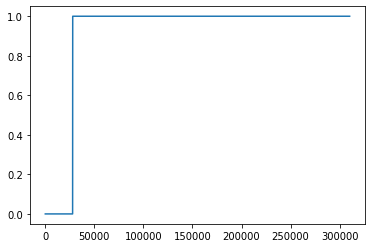

In [10]:
y_sorted = np.sort(yy, axis=0)
plt.plot(y_sorted)

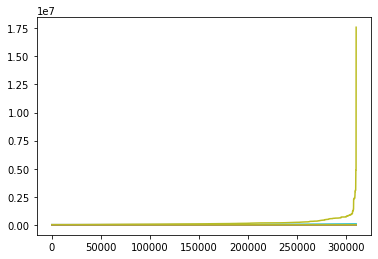

In [11]:
x_sorted = np.sort(x_train, axis=0)
plt.plot(x_sorted)